In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, random_state=42)

In [5]:
X_train.shape, X_val.shape, X_test.shape

((50000, 28, 28), (10000, 28, 28), (10000, 28, 28))

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32,  37,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  88, 112,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
          2,   2,   0,   0,   0,   0,   0,   0,   0,   7, 119,  72,  56,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
          0,   0,   0,   0,   2,  21,  25,  32,  21, 135,  60,   0, 140,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          9,  39,  58,  65,  81,  60,  95,  44, 102, 140,  32,   2, 138,
         23,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        102, 126,  65,  21,  25,  23,  30,   0,  77, 161,   0, 100, 149,
         23,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   7,
        140, 105,  93, 126, 131, 168, 231, 173,  88, 182, 119,   2,  28,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         98, 131, 203, 135,  35,  25,   0, 133, 131,  95,  95,  18,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         63, 152,  16,   0,   0,   0,   0,   2,  53,  60,  70, 100,  30,
          0,   2],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25,
         84,   0,   0,   2,   0,   0,   0,  32,  37,  25,  72,  37, 128,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  74,
          9,   0,   0,   0,   0,   0,   2,  67,  21,  44,   9,   0,  51,
         93,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,  44,
         79,   0,   0,   0,   0,   0,  42,  58,  42,  65,  21,   0,   0,
         95,  51],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         88,  60,   0,   0,   0,   0,  67,  25,  28,  46,   0,   0,  39,
        159,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  67,  70,   2,   0,   0,  44,  21,  21,  67,  81,  88, 149,
        128,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  67, 112,  23,  32,  49,  58,  46,  60, 163, 105, 102,
        112,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  18,  81,  51,  28,
         30,  11,  11,  65,  60,  88,  60,  35, 102, 191, 114, 180, 102,
         86,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  74,  65,  53,  49,
         53,  42,  44,  39,  72,  74,  16, 123, 187,  16,   0, 166, 128,
         49,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  88,  16,   0,   0,
          0,   0,   7,   0,  91,  39, 116, 182,   0,   0,   0, 131, 116,
         37,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  56, 198, 156,   0,
          0,   0,   0,  16,  70,  53, 182,   0,   0,   0,   0,  86, 116,
         30,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  28,  63, 149, 133,
          4,   0,   0, 119, 140, 145,   7,   0,   4,   2,   0,  70, 116,
         18,   0],
       [  0,   0,   0,   0,   0,   0,  14,  42,  46,  39,  23,  21, 119,
        105,   0,  60,  98, 170,  11,   0,   0,   2,   4,   0,  74, 116,
         14,   0],
       [  2,   0,   0,   0,   2, 100,  84,  77, 184, 236,  88,  21,  30,
         77, 116,  63, 138, 147,   0,   0,   0,   0,   2,   0,  63, 107,
          4,   0],
       [  0,   0,   0,   0,   4, 109,  63,   4,   7, 100,  56,  18,  25,
         35,  74, 114, 119,   0,   0,   0,   0,   0,   4,   0,  60, 105,
          2,   0],
       [  2,  21,  84, 126,  25,  30, 198,  23,   4,  11,  23,  42,  39,
         28,   7, 233,  21,   0,   0,   0,   0,   0,   2,   0,  63, 107,
          0,   0],
       [114, 138,  70,  49,  39,  23, 21

In [7]:
class_name = ['T-shirt', 'Trouser','Pulover', 'Dress','Coat', 'Sandal','Shirt', 'Sneaker','Bag', 'Ankle Boot']

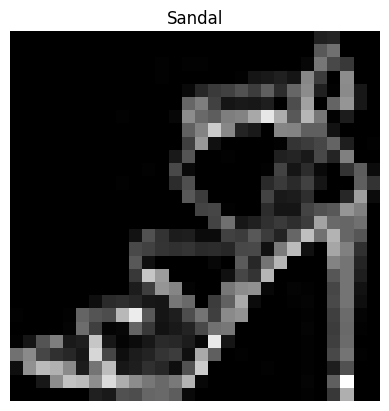

In [8]:
plt.imshow(X_train[0], cmap='gray')
plt.title(class_name[y_train[0]])
plt.axis('off')
plt.show()

In [9]:
X_train, X_val, X_test = X_train / 255.0, X_val/255.0, X_test/255.0

In [10]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [11]:
X_train.shape[1:]

(28, 28)

In [13]:
from keras.layers import Dense, Flatten

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:], name = 'Input_layer'),
    keras.layers.Dense(300, activation='relu', name = 'HL_1'),
    keras.layers.Dense(100, activation='relu', name = 'HL_2'),
    keras.layers.Dense(10, activation='softmax', name = 'Output_layer')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
weights, biases = model.layers[1].get_weights()

In [21]:
weights.shape

(784, 300)

In [ ]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [36]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs=10,batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8875 - loss: 0.3161 - val_accuracy: 0.8750 - val_loss: 0.3511
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8891 - loss: 0.3118 - val_accuracy: 0.8758 - val_loss: 0.3501
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8896 - loss: 0.3102 - val_accuracy: 0.8757 - val_loss: 0.3492
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8899 - loss: 0.3089 - val_accuracy: 0.8760 - val_loss: 0.3485
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8907 - loss: 0.3077 - val_accuracy: 0.8761 - val_loss: 0.3478
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8907 - loss: 0.3066 - val_accuracy: 0.8761 - val_loss: 0.3471
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8910 - loss: 0.3055 - val_accuracy: 0.8762 - val_loss: 0.3465
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8912 - loss: 0.3044 - 

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HL_1 (Dense)                    │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HL_2 (Dense)                    │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,612 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

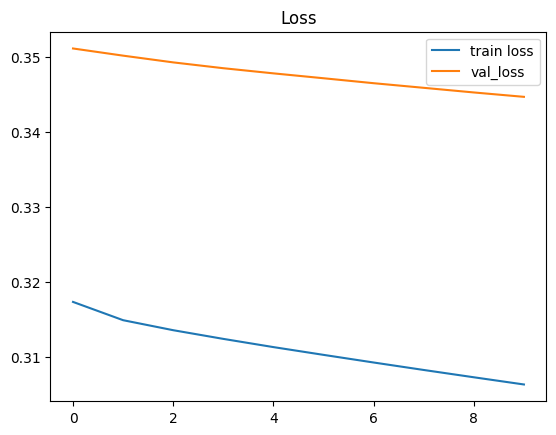

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val_loss'])
plt.title('Loss')
plt.show()

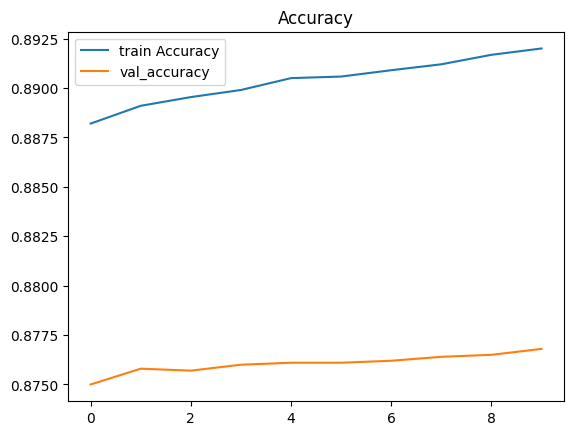

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train Accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.show()


In [31]:
from tensorflow.keras.utils import plot_model

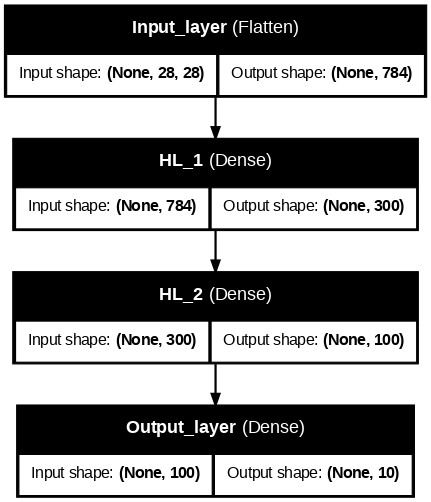

In [32]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, dpi=80)

In [42]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy*100:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8732 - loss: 0.3648
Test loss: 0.3685901463031769
Test accuracy: 86.90


In [44]:
class_name

['T-shirt',
 'Trouser',
 'Pulover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.08, 0.  , 0.88],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [45]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([9, 2, 1])

In [46]:
np.array(class_name)[y_pred]

array(['Ankle Boot', 'Pulover', 'Trouser'], dtype='<U10')

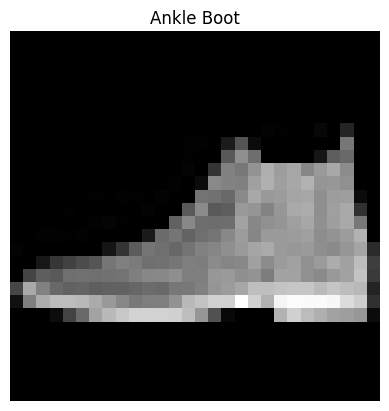

In [50]:
plt.imshow(X_new[0], cmap='gray')
plt.title(class_name[y_pred[0]])
plt.axis('off')
plt.show()